# Загрузка данных


Для исследования возьмем набор данных, состоящий из списков всех фильмов и сериалов, доступных на Netflix, а также таких деталей, как актерский состав, режиссеры, рейтинги, год выпуска, продолжительность и т.д. 
Netflix является одной из самых популярных платформ для потокового мультимедиа и видео. На их платформе доступно более 8000 фильмов или сериалов, по состоянию на середину 2021 года у них более 200 миллионов подписчиков по всему миру.

Для исследования возьмем задачу по классификации стран в зависимости от популярности у них детективов.

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
df = pd.read_csv('/content/drive/MyDrive/netflix_titles.csv')

In [34]:
df.head(2)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [35]:
df.shape

(8807, 12)

Набор данных содержит:

1.   show_id - Уникальный идентификатор для каждого фильма /
телешоу
2.   type - фильм или телешоу (сериал)
3. title - название
4. director - режиссер
5. cast - актерский состав
6. country	- страна, где был снят
7. date_added - дата, когда он был добавлен на Netflix
8. release_year - год выпуска
9. rating -телевизионный рейтинг
10. duration - продолжительность
11. listed_in - жанр
12. description - краткое описание

# EDA (разведочный анализ) и подготовка данных

In [36]:
# информация по типам данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [37]:
# проверка названий колонок
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [38]:
#удаляем последний столбец
df= df.drop(labels = 'description', axis=1)

In [39]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"


In [40]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
dtype: int64

In [41]:
# обработка пропущенных значений
df["director"].replace(np.nan,"No Director",inplace=True)
df["cast"].replace(np.nan,"No Cast",inplace=True)
df["country"].replace(np.nan,"United States",inplace= True)

df.dropna(subset=["date_added"], axis=0, inplace = True)
df.dropna(subset=["rating","duration"],axis=0, inplace = True)

In [42]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [43]:
df.shape

(8790, 11)

In [44]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [45]:
# добавим две дополнительные колонки
df["year"]=pd.DatetimeIndex(df["date_added"]).year
df["month"]=pd.DatetimeIndex(df["date_added"]).month

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


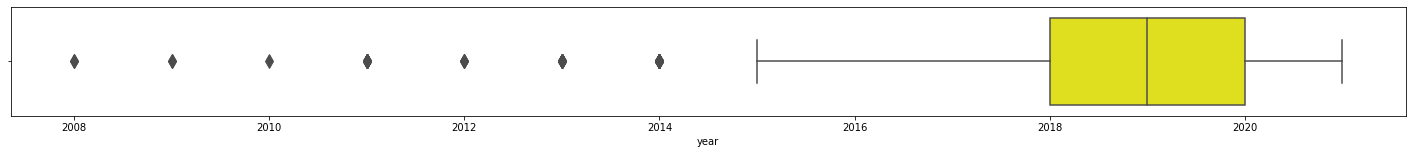

In [46]:
plt.figure(figsize=(25,2))
sns.boxplot(df['year'],fliersize=10, color='yellow');

In [47]:
# Создаем производный столбец жанр из уже имеющегося, но с неудобными значениями
gg=df["listed_in"].str.split(",",expand=True)
gg

,0,1,2
0,Documentaries,None,None
1,International TV Shows,TV Dramas,TV Mysteries
2,Crime TV Shows,International TV Shows,TV Action & Adventure
3,Docuseries,Reality TV,None
4,International TV Shows,Romantic TV Shows,TV Comedies
...,...,...,...
8802,Cult Movies,Dramas,Thrillers
8803,Kids' TV,Korean TV Shows,TV Comedies
8804,Comedies,Horror Movies,None
8805,Children & Family Movies,Comedies,None


In [48]:
df["Genre"]=gg[0]

In [49]:
# Общее количество фильмов и телешоу
count=df["type"].value_counts()
count

Movie      6126
TV Show    2664
Name: type, dtype: int64

Построим столбачтую диаграмму, чтоб визуализировать данные по типу контента.


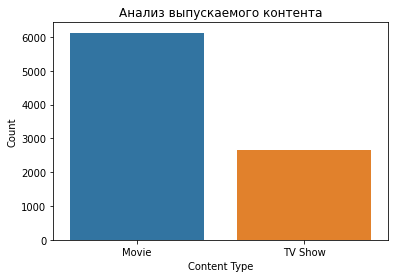

In [50]:
sns.countplot(x='type', data=df)
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.title('Анализ выпускаемого контента')
plt.show()

Из сформированной диаграммы видим, что на Netflix фильмов выпускается больше, чем сериалов.

Анализ рейтинга контента:

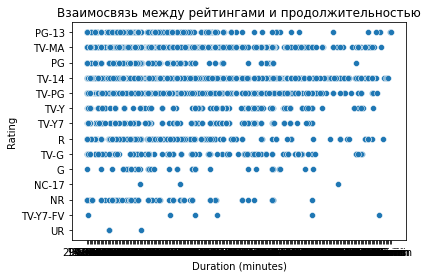

In [51]:
# анализируем отношения между переменными
# строю точечный график, чтобы визуализировать взаимосвязь между рейтингами и продолжительностью контента
sns.scatterplot(x='duration', y='rating', data=df)
plt.xlabel('Duration (minutes)')
plt.ylabel('Rating')
plt.title('Взаимосвязь между рейтингами и продолжительностью')
plt.show()

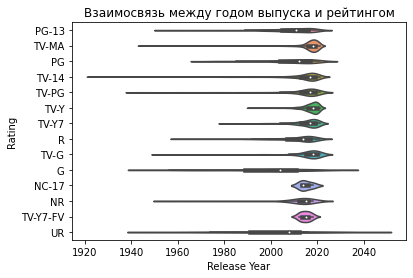

In [52]:
# визуализируем взаимосвязь между годом выпуска и рейтингом
sns.violinplot(x='release_year', y='rating', data=df)
plt.xlabel('Release Year')
plt.ylabel('Rating')
plt.title('Взаимосвязь между годом выпуска и рейтингом')
plt.show()

In [53]:
rating=df["rating"].value_counts().sort_values(ascending=False)
rating


TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


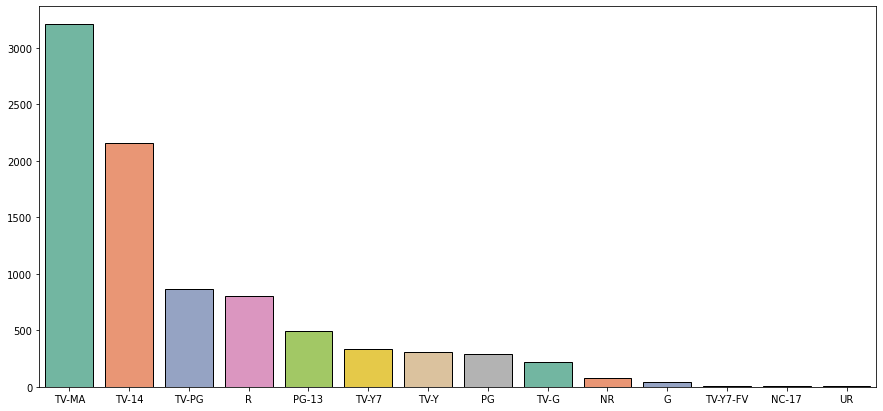

In [54]:
plt.figure(figsize=(15,7))
sns.barplot(rating.index,rating.values,estimator=sum,palette="Set2",edgecolor="black")

Наибольшее количество контента снято с рейтингом «TV-MA». «TV-MA» — это рейтинг, предназначенной только для взрослой аудитории.
Вторым по величине является «ТV-14» и "TV-PG", обозначающий контент, который может быть неподходящим для детей младше 14 лет либо обязательное нахождение взрослого рядом.
Третьим по величине является очень популярный рейтинг «R». Контент с рейтингом R - это контент, который может быть неподходящим для детей в возрасте до 17 лет.

Text(0.5, 1.0, 'Рейтинг в разрезе типа контента')

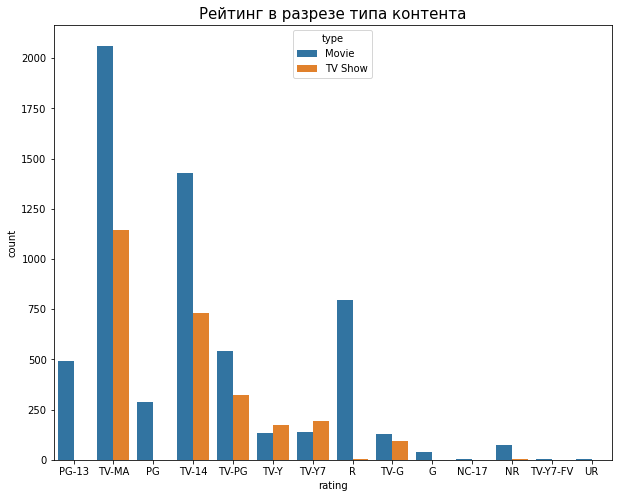

In [55]:
plt.figure(figsize=(10,8))
sns.countplot(x="rating",hue="type",data=df);
plt.title("Рейтинг в разрезе типа контента",fontsize=15)

Исходя из диаграммы можно сказать, что фильмы преобладают практически во всех категориях рейтинга.

In [56]:
# ТОП-10 режиссеров на Нетфликс
top_10_Dir= df["director"].value_counts().sort_values(ascending=False)[1:11]
top_10_Dir=top_10_Dir.reset_index()
top_10_Dir

,index,director
0,Rajiv Chilaka,19
1,"Raúl Campos, Jan Suter",18
2,Suhas Kadav,16
3,Marcus Raboy,16
4,Jay Karas,14
5,Cathy Garcia-Molina,13
6,Jay Chapman,12
7,Youssef Chahine,12
8,Martin Scorsese,12
9,Steven Spielberg,11


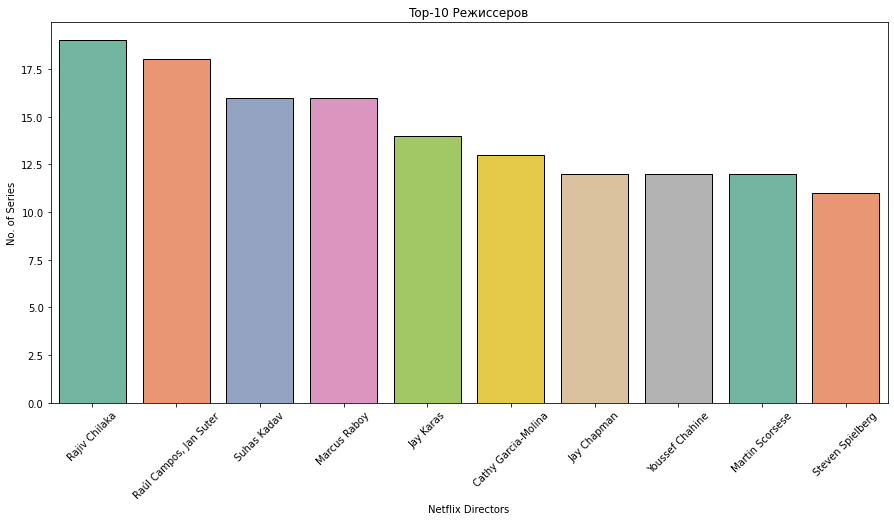

In [57]:
plt.figure(figsize=(15,7))
sns.barplot(x=top_10_Dir["index"],y=top_10_Dir["director"],data=top_10_Dir,palette="Set2",edgecolor="black")
plt.xticks(rotation=45)
plt.xlabel("Netflix Directors")
plt.ylabel("No. of Series")
plt.title("Top-10 Режиссеров");

Раджив Чилака создал больше всего контента на Нетфликс в сравнении с остальными режиссерами.


Проанализируем какая страна выпускает больше всего контента для платформы Нетфликс:

In [58]:
top_10=df["country"].value_counts().sort_values(ascending=False).head(10)
top_10

United States     3638
India              972
United Kingdom     418
Japan              243
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64

In [59]:
top10 = list(top_10.index)

print(top10)

['United States', 'India', 'United Kingdom', 'Japan', 'South Korea', 'Canada', 'Spain', 'France', 'Mexico', 'Egypt']


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

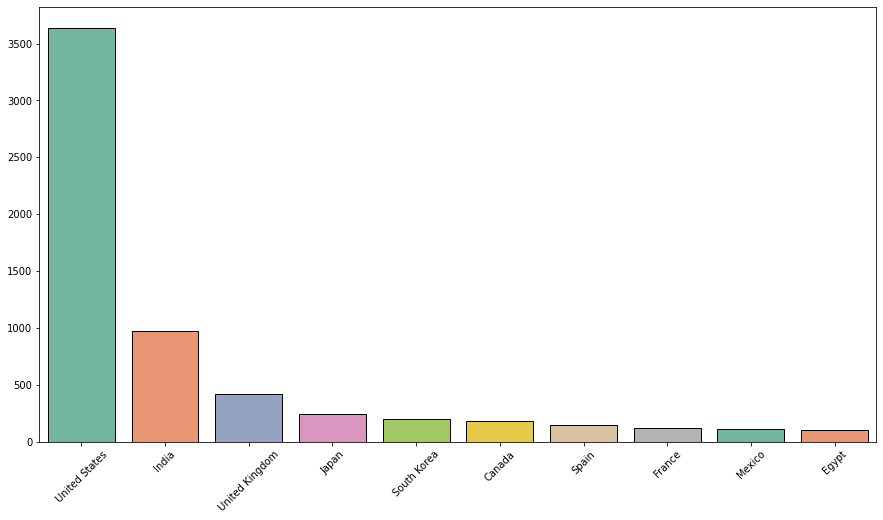

In [60]:
plt.figure(figsize=(15,8))
sns.barplot(top_10.index,top_10.values,palette="Set2",estimator=sum,edgecolor="black")
plt.xticks(rotation=45)

Как и ожидалось, регион, в котором находится штаб-квартира Netflix, то есть США, имеет самое большие производство фильмов и телешоу, тогда как Индия и Великобритания занимают второе и третье места соответственно.

Какой контент доступен в разныз странах? 
Посмотрим соотношение фильмов и телешоу, доступных в каждой из 10 ведущих стран.

In [61]:
country_type = df.groupby('country')['type'].value_counts().unstack()
country_type_10 = country_type.loc[top10]
country_type_10['sum'] = country_type_10.sum(axis=1)

display(country_type_10)

type,Movie,TV Show,sum
country,,,
United States,2494.0,1144.0,3638.0
India,893.0,79.0,972.0
United Kingdom,206.0,212.0,418.0
Japan,76.0,167.0,243.0
South Korea,41.0,158.0,199.0
Canada,122.0,59.0,181.0
Spain,97.0,48.0,145.0
France,75.0,49.0,124.0
Mexico,70.0,40.0,110.0


In [62]:
# преобразуем полученные значения в процентное соотношение
country_type_10_per = (country_type_10.T / country_type_10['sum']).T

country_type_10_per_sort = country_type_10_per[['Movie','TV Show']].sort_values(by='Movie')

display(country_type_10_per_sort)

type,Movie,TV Show
country,,
South Korea,0.206030,0.793970
Japan,0.312757,0.687243
United Kingdom,0.492823,0.507177
France,0.604839,0.395161
Mexico,0.636364,0.363636
Spain,0.668966,0.331034
Canada,0.674033,0.325967
United States,0.685542,0.314458
Egypt,0.867925,0.132075


Text(0.805, 0.9, 'TV Show')

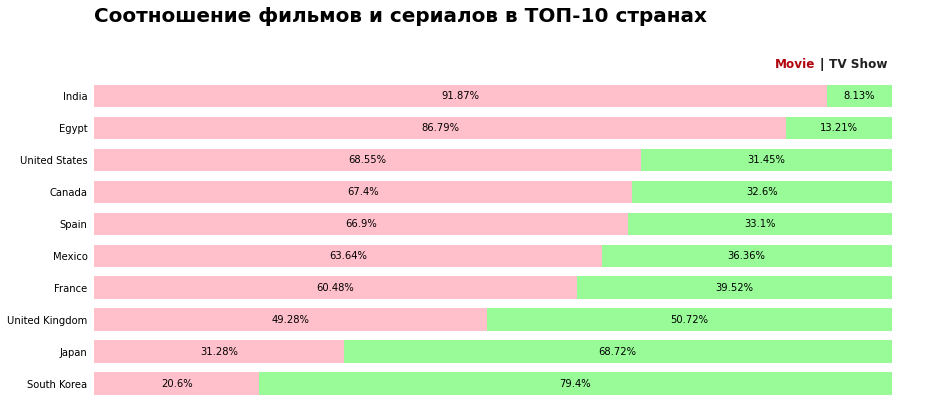

In [63]:
fig = plt.figure(figsize=(15, 6))
ax = country_type_10_per_sort['Movie'].plot(kind='barh', width=0.7, color='Pink')
ax = country_type_10_per_sort['TV Show'].plot(kind='barh', width=0.7, color='Palegreen', left=country_type_10_per_sort['Movie'])

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(s=str(np.round(width*100, 2)) + '%', 
                xy=(left+width/2, bottom+height/2), 
                ha='center', va='center', color='black')


ax.tick_params(axis='both', which='major', bottom=False, left=False, labelsize=10)
ax.set_xticklabels([])


for s in ['top', 'right', 'bottom', 'left']:
    ax.spines[s].set_visible(False)


ax.set_title('Соотношение фильмов и сериалов в ТОП-10 странах', loc='left', y=1.15, size=20, fontweight='bold', fontfamily='san serif')
ax.set_ylabel(None)
fig.text(0.755,0.9,'Movie', fontweight='bold', fontsize=12, color='#b20710')
fig.text(0.796,0.9,'|', fontweight='bold', fontsize=12, color='black')
fig.text(0.805,0.9,'TV Show', fontweight='bold', fontsize=12, color='#221f1f')


Мы видим, что на индийском рынке в значительной степени преобладают фильмы, и почти 92% контента попадает в эту категорию. С другой стороны, в Южной Корее все наоборот: только 20,6% контента составляют фильмы. 

Проанализируем в какой год выпускалось больше всего контента:


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Контент добавленный за год')

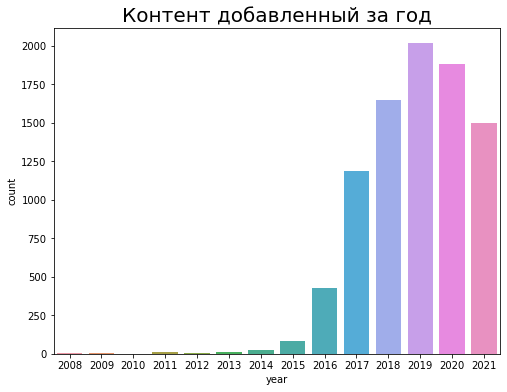

In [64]:
plt.rcParams['figure.figsize']=(8,6) 
sns.countplot(df['year'])
plt.title("Контент добавленный за год",fontsize=20)

Больше всего контента на платформе Нетфликс было выпущено в 2019 году, скорее всего снижение, начиная с 2020 года, возникло в связи с пандемией короновируса.

In [65]:
# узнаем какой жанр преобладает в контенте и соответственно больше всего пользуется спросом
genre=df["Genre"].value_counts().sort_values()
genre

Sports Movies                      1
TV Sci-Fi & Fantasy                1
LGBTQ Movies                       1
Spanish-Language TV Shows          2
Romantic Movies                    3
TV Horror                         11
Cult Movies                       12
Sci-Fi & Fantasy                  13
TV Shows                          16
Music & Musicals                  18
Classic & Cult TV                 20
Independent Movies                20
Anime Features                    21
Romantic TV Shows                 32
Stand-Up Comedy & Talk Shows      34
TV Action & Adventure             39
Movies                            53
Thrillers                         65
TV Dramas                         67
Classic Movies                    80
TV Comedies                      119
Reality TV                       120
International Movies             128
Anime Series                     174
Docuseries                       220
British TV Shows                 252
Horror Movies                    275
S

Text(0.5, 1.0, 'Анализ контента Нетфликс по жанрам')

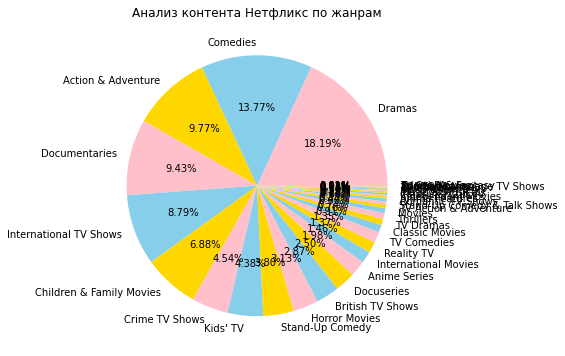

In [66]:
labels = df['Genre'].value_counts().index
size = df['Genre'].value_counts().values
plt.pie(size,colors= ['pink','skyblue','gold'],labels = labels,autopct = "%.2f%%")
plt.title('Анализ контента Нетфликс по жанрам')

Драма и комедия самые популярные жанры в фильмах и сериалах на Netflix.

Проведем анализ продолжительности фильмов:

In [84]:
# разделяем набор данных на фильмы и сериалы для более подробного анализа
movies = df[df['type']=='Movie']
tv_shows = df[df['type']=='TV Show']

In [85]:
movies['duration']=movies['duration'].str.replace(' min','')
movies['duration']=movies['duration'].astype(str).astype(int)
movies['duration']

<ipython-input-85-1c21db96df55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration']=movies['duration'].str.replace(' min','')
<ipython-input-85-1c21db96df55>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration']=movies['duration'].astype(str).astype(int)


0        90
6        91
7       125
9       104
12      127
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: duration, Length: 6126, dtype: int64

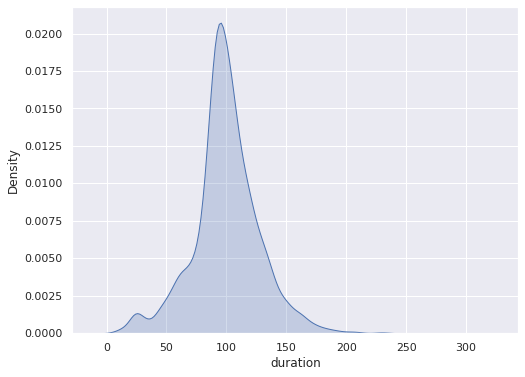

In [86]:
sns.set(style="darkgrid")
sns.kdeplot(data=movies['duration'], shade=True)

Видим, что большинство фильмов на Нетфликс имеют продолжительность 70-130 минут. В полученных данных не сомневаемся, так как действительно не каждый зритель сможет посмотреть 3х часовой фильм и таких фильмов стараются выпускать не очень много.

In [87]:
tv=tv_shows['duration'].apply(lambda x:int(str(x).split(' ')[0]))
tv_shows=tv_shows.drop('duration',axis=1)
tv_shows['seasons']=tv
tv_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,year,month,Genre,seasons
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",2021,9,International TV Shows,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",2021,9,Crime TV Shows,1
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,United States,"September 24, 2021",2021,TV-MA,"Docuseries, Reality TV",2021,9,Docuseries,1
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",2021,9,International TV Shows,2
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,"September 24, 2021",2021,TV-MA,"TV Dramas, TV Horror, TV Mysteries",2021,9,TV Dramas,1


In [88]:
movie=movies['duration'].apply(lambda x:int(str(x).split(' ')[0]))
movies=movies.drop('duration',axis=1)
movies['duration']=movie
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,year,month,Genre,duration
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,Documentaries,2021,9,Documentaries,90
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",2021,PG,Children & Family Movies,2021,9,Children & Family Movies,91
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,"Dramas, Independent Movies, International Movies",2021,9,Dramas,125
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,"Comedies, Dramas",2021,9,Comedies,104
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,"Dramas, International Movies",2021,9,Dramas,127


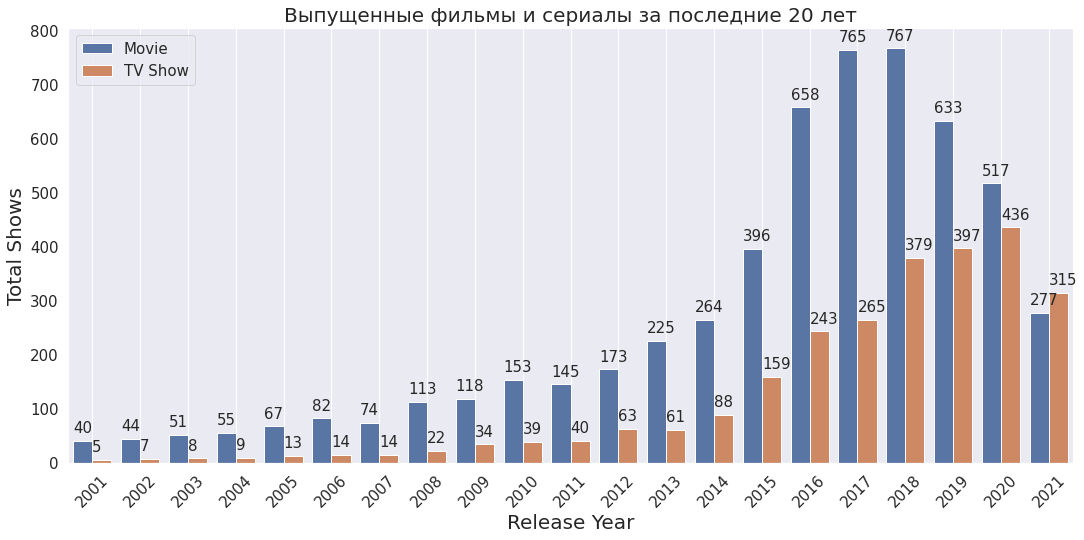

In [89]:
plt.figure(figsize=(18,8))
gr = sns.countplot(data=df[(df['release_year'].max() - df['release_year'])<=20],
           x='release_year', hue='type')
plt.xticks(rotation=45,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Release Year',fontsize=20)
plt.ylabel('Total Shows',fontsize=20)
plt.legend(fontsize=15,loc='upper left')
plt.grid()
plt.title('Выпущенные фильмы и сериалы за последние 20 лет',fontsize=20)
for p in gr.patches:
    gr.annotate('{}'.format(p.get_height()),(p.get_x(),p.get_height()+15),fontsize=15)
plt.show()

С 2015 по 2019 год наблюдается тенденция на увеличение производства фильмов, однако с 2019 года началась тенденция к уравниваю соотношения выпускаемых фильмов и сериалов. Сериалы в последние годы пользуются большим спросом, чем фильмы и соответственно их количества растет совместно со спросом.

Далее проведем анализ сериалов, узнаем какое количество сезонов самое популярное на Нетфликсе.

Text(0.5, 1.0, 'Анализ сериалов по количеству сезонов')

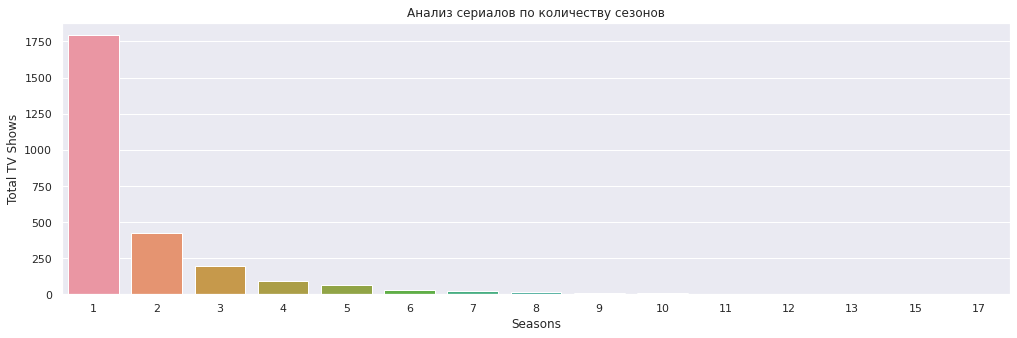

In [90]:
m=tv_shows.groupby(['seasons']).agg({'show_id':'nunique'}).reset_index()
plt.figure(figsize=(17,5))
sns.barplot(data=m, x='seasons',y='show_id')
plt.xlabel('Seasons')
plt.ylabel('Total TV Shows')
plt.title('Анализ сериалов по количеству сезонов')

Большинство сериалов имеют не более 3 сезонов. На мой взгляд это связано с тем, что только в последние года начали активное производство сериалы и большое количество сезонов популярных новых сериалов еще не успели снять. Так же большинство сериалов прекратило свое производство из-за пандемии короновируса.

Хочу вернуться к более подробному анализу режиссеров, которые снимают контент для платформы Нетфликс, так как результат полученный ранее мне не понравился, режиссер у которого больше всего контента на платформе оказался, на мой взгляд после изучения его биографии, не очень популярным и в основном выпускает мультфильмы для детей.

Text(0.5, 1.0, 'Top 10 Режиссеров, которые сняли больше всего фильмов за год')

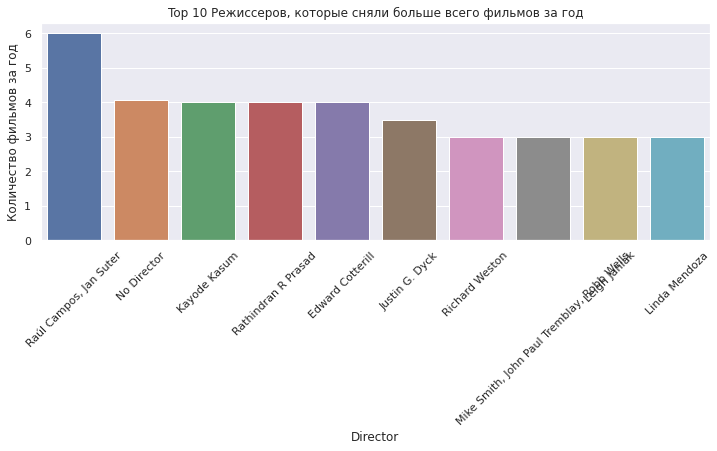

In [91]:
c=movies[movies['director']!='Unknown'].groupby(['director']).apply(
    lambda x:(x['show_id'].nunique())/((x['release_year'].max()-x['release_year'].min())+1)).reset_index().sort_values(
    0,ascending=False).head(10)
plt.figure(figsize=(12,4))
sns.barplot(data=c, x='director',y=0)
plt.xticks(rotation=45)
plt.xlabel('Director')
plt.ylabel('Количество фильмов за год')
plt.title('Top 10 Режиссеров, которые сняли больше всего фильмов за год')

Анализ фильмов и сериалов по годам и месяцам:

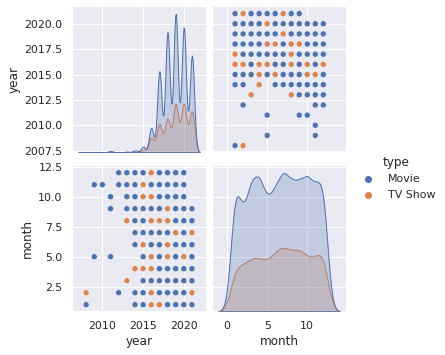

In [92]:
# В феврале и июле 2021 года было добавлено больше сериалов, чем фильмов.
sns.pairplot(data=df[['type','year','month']],hue='type')

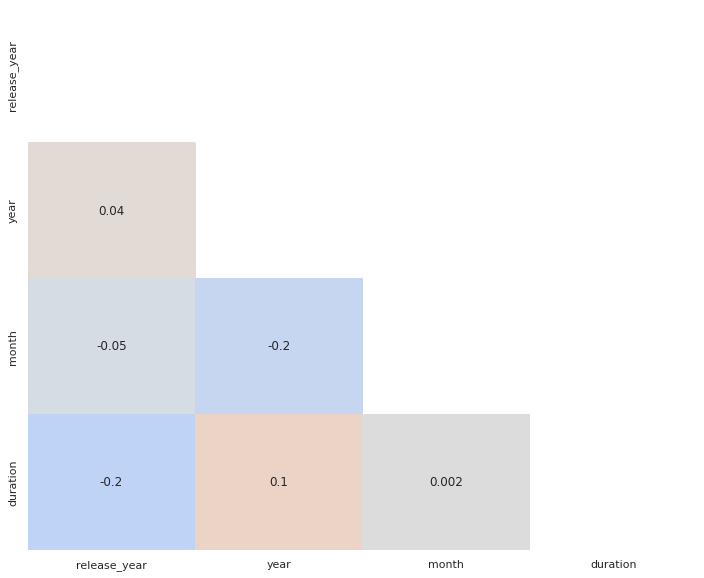

In [93]:
# корреляция
sns.set_style('white')
plt.figure(figsize = (12,10))
matrix = np.triu(movies.corr())
sns.heatmap(movies.corr(),annot = True, fmt='.1g', mask=matrix, vmin=-1,
            vmax=1, center= 0, cmap= 'coolwarm', cbar=False)

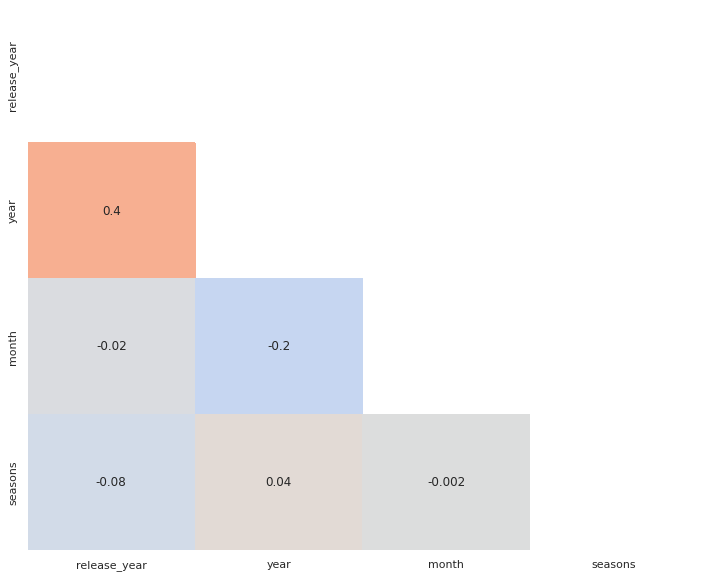

In [94]:
sns.set_style('white')
plt.figure(figsize = (12,10))
matrix = np.triu(tv_shows.corr())
sns.heatmap(tv_shows.corr(),annot = True, fmt='.1g', mask=matrix, vmin=-1,
            vmax=1, center= 0, cmap= 'coolwarm', cbar=False)

# Кодирование категориальных признаков

In [95]:
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year,month,Genre
6328,s6329,Movie,Black Snow,Martin Hodara,"Ricardo Darín, Leonardo Sbaraglia, Laia Costa,...","Argentina, Spain","July 1, 2017",2017,TV-MA,91 min,"Dramas, International Movies, Thrillers",2017,7,Dramas
3229,s3230,Movie,Super Monsters Save Christmas,Steve Ball,"Elyse Maloway, Vincent Tong, Erin Mathews, And...",United States,"November 26, 2019",2019,TV-Y,24 min,Children & Family Movies,2019,11,Children & Family Movies
1903,s1904,Movie,An Ordinary Man,Brad Silberling,"Ben Kingsley, Hera Hilmar, Peter Serafinowicz","Serbia, United States","October 1, 2020",2017,R,91 min,"Dramas, Thrillers",2020,10,Dramas
960,s961,TV Show,The Innocent,Oriol Paulo,"Mario Casas, Alexandra Jiménez, Aura Garrido, ...",United States,"April 30, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",2021,4,Crime TV Shows
8589,s8590,Movie,Tik Tok,Li Jun,"Wallace Chung, Jung-jae Lee, Lang Yueting, Cha...",China,"July 1, 2017",2016,TV-14,108 min,"Dramas, International Movies, Thrillers",2017,7,Dramas


,show_id,type,title,director,cast,date_added,release_year,rating,duration,listed_in,year,month
0,s1,0.0,Dick Johnson Is Dead,Kirsten Johnson,No Cast,"September 25, 2021",2020,PG-13,90 min,Documentaries,2021,9
1,s2,NaN,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...","September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021,9
2,s3,NaN,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...","September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,9
3,s4,NaN,Jailbirds New Orleans,No Director,No Cast,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV",2021,9
4,s5,NaN,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...","September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",2021,9
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,0.0,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...","November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers",2019,11
8803,s8804,NaN,Zombie Dumb,No Director,No Cast,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies",2019,7
8804,s8805,0.0,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...","November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",2019,11
8805,s8806,0.0,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...","January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies",2020,1


In [97]:
row= df

In [106]:
df[df['Genre']=='Dramas']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year,month,Genre
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,9,Dramas
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",2021,9,Dramas
30,s31,Movie,Ankahi Kahaniya,"Ashwiny Iyer Tiwari, Abhishek Chaubey, Saket C...","Abhishek Banerjee, Rinku Rajguru, Delzad Hiwal...",United States,"September 17, 2021",2021,TV-14,111 min,"Dramas, Independent Movies, International Movies",2021,9,Dramas
35,s36,Movie,The Father Who Moves Mountains,Daniel Sandu,"Adrian Titieni, Elena Purea, Judith State, Val...",United States,"September 17, 2021",2021,TV-MA,110 min,"Dramas, International Movies, Thrillers",2021,9,Dramas
42,s43,Movie,Jaws 2,Jeannot Szwarc,"Roy Scheider, Lorraine Gary, Murray Hamilton, ...",United States,"September 16, 2021",1978,PG,116 min,"Dramas, Horror Movies, Thrillers",2021,9,Dramas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8788,s8789,Movie,You Carry Me,Ivona Juka,"Lana Baric, Vojislav Brajovic, Natasa Janjic, ...","Croatia, Slovenia, Serbia, Montenegro","July 1, 2016",2015,TV-MA,157 min,"Dramas, International Movies",2016,7,Dramas
8794,s8795,Movie,اشتباك,Mohamed Diab,"Nelly Karim, Hany Adel, Tarek Abdel Aziz, Ahme...","Egypt, France","October 11, 2018",2016,TV-14,98 min,"Dramas, Independent Movies, International Movies",2018,10,Dramas
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,"February 15, 2018",2009,TV-14,120 min,"Dramas, International Movies",2018,2,Dramas
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",2016,3,Dramas


In [107]:
def get_genre(row):
  if row['Genre']=='Dramas':
    return 1
  else:
    return 0

In [109]:
df = df.assign(Dramas_count=df.apply(get_genre,axis=1))

In [110]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year,month,Genre,Dramas_count
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,2021,9,Documentaries,0


In [ ]:
X = df.drop(['Genre','Dramas_count'],axis=1)
y = df['Dramas_count']